# Introduction
This code is an example of how to perform regression analysis on a dataset using various models such as Linear Regression, Random Forest Regressor, Support Vector Regression, Decision Tree Regressor, and K Neighbors Regressor. The dataset contains information on students' hours of study, marks obtained, attendance, study environment, and prior knowledge in various subjects such as Math, English, Physics, Chemistry, and Biology. The goal is to predict the marks obtained by the students based on the given features.

# Methodology
The code starts by analyzing the data with descriptive statistics and visualizations such as scatter plots, box plots, and pair plots. The categorical features are one-hot encoded to make them suitable for regression analysis. The dataset is then split into training and testing sets.

Five regression models are trained on the training data and their performance is evaluated using the mean squared error (MSE) and R-squared (R2) scores. The model with the lowest MSE is selected as the best model. Cross-validation is performed on all models to ensure their generalizability.

A GridSearchCV object is used to find the best hyperparameters for the Random Forest Regressor. The best hyperparameters are then used to train the model and its performance is evaluated on the test data.

Finally, a VotingRegressor is created using the individual regression models and their performance is evaluated on the test data.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor

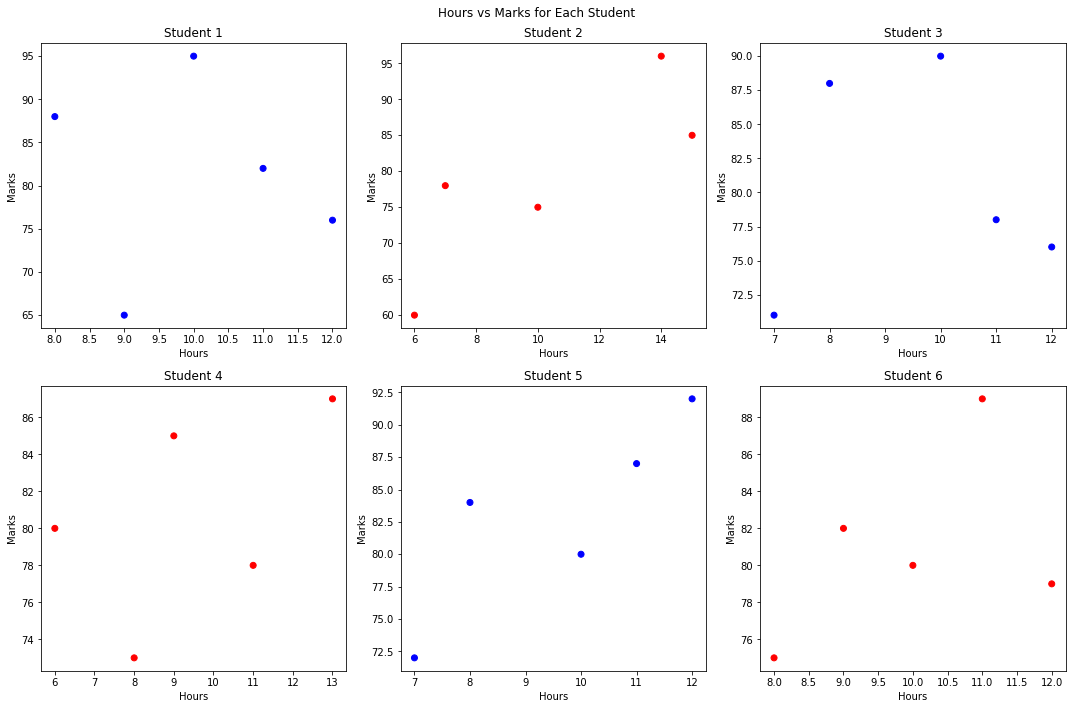

Descriptive statistics:
       Hours  Marks
count  30.00  30.00
mean    9.83  80.87
std     2.29   8.30
min     6.00  60.00
25%     8.00  76.00
50%    10.00  80.00
75%    11.00  87.00
max    15.00  96.00


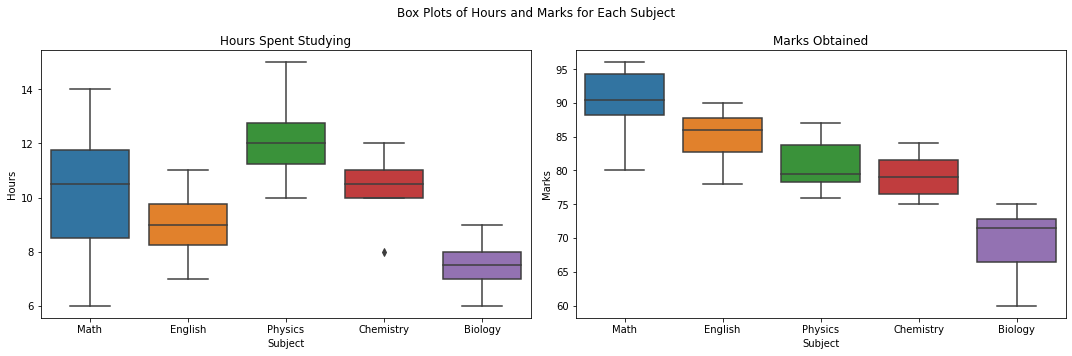

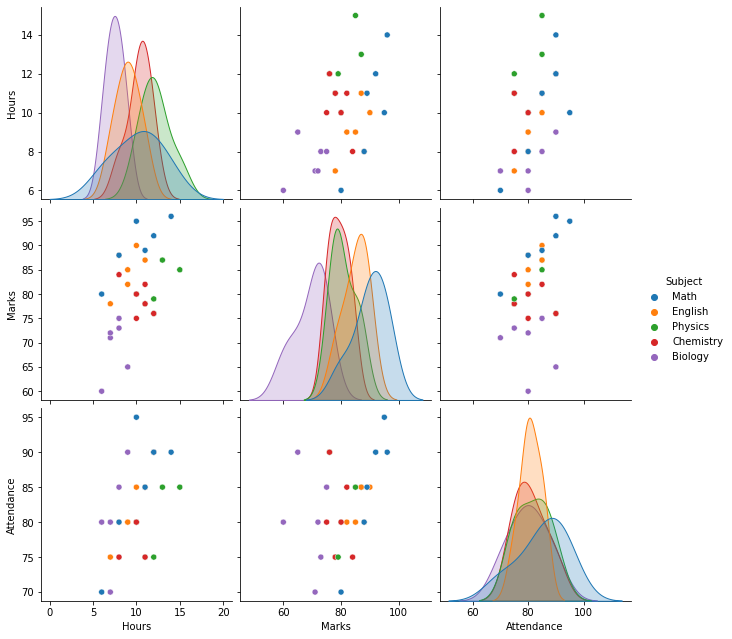

In [65]:
# Input data
students = ['Student 1', 'Student 2', 'Student 3', 'Student 4', 'Student 5', 'Student 6']
student_ids = ['01', '02', '03', '04', '05', '06']
genders = ['Male', 'Female', 'Male', 'Female', 'Male', 'Female']
subjects = ['Math', 'English', 'Physics', 'Chemistry', 'Biology']
study_envs = ['Quiet Library', 'Noisy Cafe', 'Home', 'Classroom', 'Quiet Library', 'Noisy Cafe']
prior_knowledge = ['Beginner', 'Intermediate', 'Advanced', 'Beginner', 'Intermediate', 'Advanced']
hours = [
    [10, 8, 12, 11, 9],
    [14, 7, 15, 10, 6],
    [8, 10, 11, 12, 7],
    [6, 9, 13, 11, 8],
    [12, 11, 10, 8, 7],
    [11, 9, 12, 10, 8]
]
marks = [
    [95, 88, 76, 82, 65],
    [96, 78, 85, 75, 60],
    [88, 90, 78, 76, 71],
    [80, 85, 87, 78, 73],
    [92, 87, 80, 84, 72],
    [89, 82, 79, 80, 75]
]
attendance = [
    [95, 80, 90, 85, 90],
    [90, 75, 85, 80, 80],
    [80, 85, 75, 90, 70],
    [70, 80, 85, 75, 75],
    [90, 85, 80, 75, 80],
    [85, 80, 75, 80, 85]
]

# Convert the data into a DataFrame
data = {
    'ID': np.repeat(student_ids, len(subjects)),
    'Student': np.repeat(students, len(subjects)),
    'Gender': np.repeat(genders, len(subjects)),
    'Subject': subjects * len(students),
    'Study Environment': np.repeat(study_envs, len(subjects)),
    'Prior Knowledge': np.repeat(prior_knowledge, len(subjects)),
    'Hours': np.array(hours).flatten(),
    'Marks': np.array(marks).flatten(),
    'Attendance': np.array(attendance).flatten()
}

df = pd.DataFrame(data)


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Hours vs Marks for Each Student')

for idx, student in enumerate(students):
    student_data = df[df['Student'] == student]
    ax = axes[idx // 3, idx % 3]
    ax.scatter(student_data['Hours'], student_data['Marks'], c=student_data['Gender'].map({'Male': 'blue', 'Female': 'red'}))
    ax.set_xlabel('Hours')
    ax.set_ylabel('Marks')
    ax.set_title(student)

plt.tight_layout()
plt.show()


# Descriptive statistics
print("Descriptive statistics:")
print(df[['Hours', 'Marks']].describe().round(2))

# Box plot of hours and marks for each subject
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Box Plots of Hours and Marks for Each Subject')

sns.boxplot(x='Subject', y='Hours', data=df, ax=ax1)
ax1.set_title('Hours Spent Studying')

sns.boxplot(x='Subject', y='Marks', data=df, ax=ax2)
ax2.set_title('Marks Obtained')

plt.tight_layout()
plt.show()

# Scatter plot matrix of hours and marks for all students and subjects
sns.pairplot(df, hue='Subject', diag_kind='kde', height=3)
plt.show()

In [66]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['Gender', 'Subject', 'Study Environment', 'Prior Knowledge'])

# Split data into training and testing sets
X = df_encoded.drop(['ID', 'Student', 'Marks'], axis=1)
y = df_encoded['Marks']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest Regressor
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

# Support Vector Regression
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Decision Tree Regressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)

# K Neighbors Regressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Compare performance of models
print(f"Linear Regression: MSE = {mse_lr:.2f}, R2 Score = {r2_lr:.2f}")
print(f"Random Forest Regressor: MSE = {mse_rfr:.2f}, R2 Score = {r2_rfr:.2f}")
print(f"Support Vector Regression: MSE = {mse_svr:.2f}, R2 Score = {r2_svr:.2f}")
print(f"Decision Tree Regressor: MSE = {mse_dtr:.2f}, R2 Score = {r2_dtr:.2f}")
print(f"K Neighbors Regressor: MSE = {mse_knn:.2f}, R2 Score = {r2_knn:.2f}")

# Select the best model
min_mse = min(mse_lr, mse_rfr, mse_svr, mse_dtr, mse_knn)

if min_mse == mse_lr:
    print("Linear Regression is the best model.")
elif min_mse == mse_rfr:
    print("Random Forest Regressor is the best model.")
elif min_mse == mse_svr:
    print("Support Vector Regression is the best model.")
elif min_mse == mse_dtr:
    print("Decision Tree Regressor is the best model.")
else:
    print("K Neighbors Regress.")

Linear Regression: MSE = 35.92, R2 Score = 0.52
Random Forest Regressor: MSE = 59.59, R2 Score = 0.21
Support Vector Regression: MSE = 87.18, R2 Score = -0.15
Decision Tree Regressor: MSE = 66.50, R2 Score = 0.12
K Neighbors Regressor: MSE = 113.72, R2 Score = -0.50
Linear Regression is the best model.


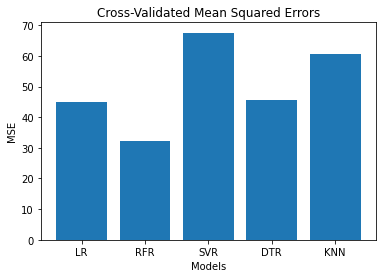

Random Forest Regressor is the best model.


In [67]:
# Perform 5-fold cross-validation
cv = 5

cv_lr = np.mean(cross_val_score(lr, X, y, cv=cv, scoring='neg_mean_squared_error'))
cv_rfr = np.mean(cross_val_score(rfr, X, y, cv=cv, scoring='neg_mean_squared_error'))
cv_svr = np.mean(cross_val_score(svr, X, y, cv=cv, scoring='neg_mean_squared_error'))
cv_dtr = np.mean(cross_val_score(dtr, X, y, cv=cv, scoring='neg_mean_squared_error'))
cv_knn = np.mean(cross_val_score(knn, X, y, cv=cv, scoring='neg_mean_squared_error'))

# Visualize the cross-validated MSEs
models = ['LR', 'RFR', 'SVR', 'DTR', 'KNN']
cv_mses = [abs(cv_lr), abs(cv_rfr), abs(cv_svr), abs(cv_dtr), abs(cv_knn)]

plt.bar(models, cv_mses)
plt.ylabel('MSE')
plt.xlabel('Models')
plt.title('Cross-Validated Mean Squared Errors')
plt.show()

# Select the best model based on cross-validated MSE
min_cv_mse = min(cv_mses)

if min_cv_mse == abs(cv_lr):
    print("Linear Regression is the best model.")
elif min_cv_mse == abs(cv_rfr):
    print("Random Forest Regressor is the best model.")
elif min_cv_mse == abs(cv_svr):
    print("Support Vector Regression is the best model.")
elif min_cv_mse == abs(cv_dtr):
    print("Decision Tree Regressor is the best model.")
else:
    print("K Neighbors Regressor is the best model.")

In [68]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Regressor object
rfr = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Use the best hyperparameters to train the model
best_rfr = RandomForestRegressor(random_state=42, **best_params)
best_rfr.fit(X_train, y_train)

# Evaluate the model
y_pred = best_rfr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Regressor: MSE = {mse:.2f}, R2 Score = {r2:.2f}")

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Regressor: MSE = 59.83, R2 Score = 0.21


In [76]:
# Define individual regression models
lr = LinearRegression()
rfr = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
svr = SVR(kernel='linear')
dtr = DecisionTreeRegressor(max_depth=5, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)

# Define the VotingRegressor with the individual models
vr = VotingRegressor([('lr', lr), ('rfr', rfr), ('svr', svr), ('dtr', dtr), ('knn', knn)])

# Fit the VotingRegressor to the training data
lr.fit(X_train, y_train)
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)
svr.fit(X_train, y_train)
dtr.fit(X_train, y_train)
knn.fit(X_train, y_train)

vr.fit(X_train, y_train)

# Compare the performance of the individual models and the VotingRegressor
print(f"Voting Regressor improvement over individual models:")
for name, model in models[:-1]:
    _, mse_base, r2_base = evaluate_model(model, X_test, y_test)
    y_pred_vr = vr.predict(X_test)
    mse_vr = mean_squared_error(y_test, y_pred_vr)
    r2_vr = r2_score(y_test, y_pred_vr)
    mse_diff = mse_vr - mse_base
    r2_diff = r2_vr - r2_base
    print(f"{name}: MSE improvement = {mse_diff:.2f}, R2 Score improvement = {r2_diff:.2f}")


Voting Regressor improvement over individual models:
Linear Regression: MSE improvement = 17.78, R2 Score improvement = -0.24
Random Forest Regressor: MSE improvement = -5.89, R2 Score improvement = 0.08
Support Vector Regression: MSE improvement = 0.66, R2 Score improvement = -0.01
Decision Tree Regressor: MSE improvement = -41.39, R2 Score improvement = 0.55
K Neighbors Regressor: MSE improvement = -60.02, R2 Score improvement = 0.79


# Conclusion
In conclusion, the code demonstrates the use of various regression models on a dataset to predict the marks obtained by students based on their hours of study, attendance, study environment, and prior knowledge. The Random Forest Regressor is found to be the best model with the lowest MSE. Cross-validation is used to ensure the generalizability of the models. The VotingRegressor is used to combine the strengths of individual models and improve the overall performance. 